In [1]:
# Parameters
file_path = "NKE.csv"


<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,96.980003,99.190002,96.550003,98.750000,97.359978,20909100
1,2023-08-24,98.699997,99.190002,97.559998,97.629997,96.255737,10310000
2,2023-08-25,98.500000,99.089996,97.809998,98.839996,97.448708,7290600
3,2023-08-28,99.589996,100.059998,98.870003,99.629997,98.227592,6006600
4,2023-08-29,100.029999,102.160004,99.720001,101.769997,100.337463,8641600
...,...,...,...,...,...,...,...
247,2024-08-16,82.879997,83.940002,82.440002,83.230003,83.230003,13794200
248,2024-08-19,83.230003,83.989998,82.919998,83.279999,83.279999,9627300
249,2024-08-20,83.489998,83.900002,82.769997,83.559998,83.559998,7863100
250,2024-08-21,83.669998,84.239998,83.220001,84.000000,84.000000,6915900


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,98.750000
1,2023-08-24,97.629997
2,2023-08-25,98.839996
3,2023-08-28,99.629997
4,2023-08-29,101.769997
...,...,...
247,2024-08-16,83.230003
248,2024-08-19,83.279999
249,2024-08-20,83.559998
250,2024-08-21,84.000000


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_88298/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,98.750000
2023-08-24,97.629997
2023-08-25,98.839996
2023-08-28,99.629997
2023-08-29,101.769997
...,...
2024-08-16,83.230003
2024-08-19,83.279999
2024-08-20,83.559998


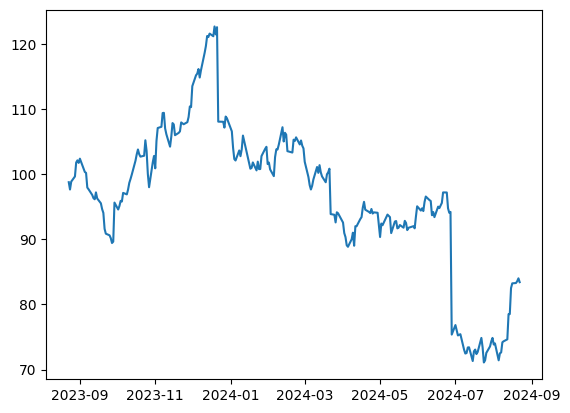

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,98.750000,97.629997,98.839996,99.629997,101.769997,102.099998,101.709999,102.360001,100.320000,...,90.849998,90.599998,90.169998,89.419998,89.629997,95.620003,94.559998,95.089996,95.889999,95.790001
1,2023-10-06,97.629997,98.839996,99.629997,101.769997,102.099998,101.709999,102.360001,100.320000,100.180000,...,90.599998,90.169998,89.419998,89.629997,95.620003,94.559998,95.089996,95.889999,95.790001,97.110001
2,2023-10-09,98.839996,99.629997,101.769997,102.099998,101.709999,102.360001,100.320000,100.180000,97.930000,...,90.169998,89.419998,89.629997,95.620003,94.559998,95.089996,95.889999,95.790001,97.110001,96.879997
3,2023-10-10,99.629997,101.769997,102.099998,101.709999,102.360001,100.320000,100.180000,97.930000,97.669998,...,89.419998,89.629997,95.620003,94.559998,95.089996,95.889999,95.790001,97.110001,96.879997,97.620003
4,2023-10-11,101.769997,102.099998,101.709999,102.360001,100.320000,100.180000,97.930000,97.669998,96.790001,...,89.629997,95.620003,94.559998,95.089996,95.889999,95.790001,97.110001,96.879997,97.620003,98.650002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,75.430000,73.050003,72.459999,72.540001,73.389999,73.419998,71.309998,72.809998,73.070000,...,71.419998,72.500000,72.620003,74.190002,74.339996,74.639999,78.500000,78.519997,82.500000,83.230003
218,2024-08-19,73.050003,72.459999,72.540001,73.389999,73.419998,71.309998,72.809998,73.070000,72.379997,...,72.500000,72.620003,74.190002,74.339996,74.639999,78.500000,78.519997,82.500000,83.230003,83.279999
219,2024-08-20,72.459999,72.540001,73.389999,73.419998,71.309998,72.809998,73.070000,72.379997,72.699997,...,72.620003,74.190002,74.339996,74.639999,78.500000,78.519997,82.500000,83.230003,83.279999,83.559998
220,2024-08-21,72.540001,73.389999,73.419998,71.309998,72.809998,73.070000,72.379997,72.699997,74.860001,...,74.190002,74.339996,74.639999,78.500000,78.519997,82.500000,83.230003,83.279999,83.559998,84.000000


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

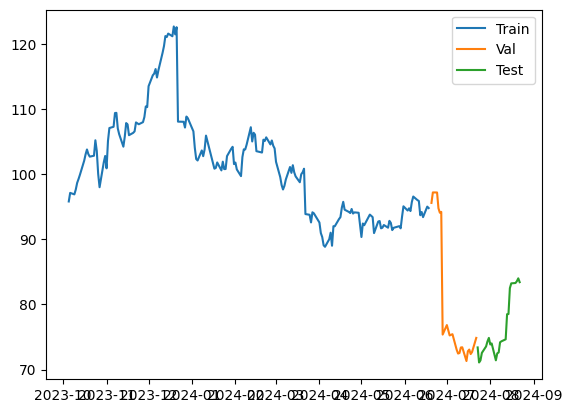

In [11]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 788ms/step - loss: 10235.6797 - mean_absolute_error: 100.8530

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10318.0098 - mean_absolute_error: 101.2430 

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10220.3965 - mean_absolute_error: 100.7712

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 10153.7617 - mean_absolute_error: 100.4455

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 10132.3672 - mean_absolute_error: 100.3410 - val_loss: 5829.7891 - val_mean_absolute_error: 75.7212


Epoch 2/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9703.3281 - mean_absolute_error: 98.1814

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9403.0723 - mean_absolute_error: 96.5899

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9270.2090 - mean_absolute_error: 95.8988 - val_loss: 4289.9443 - val_mean_absolute_error: 64.7143


Epoch 3/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7340.3311 - mean_absolute_error: 85.4294

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6901.9585 - mean_absolute_error: 82.6294

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6698.5991 - mean_absolute_error: 81.3132 - val_loss: 1178.3258 - val_mean_absolute_error: 32.4171


Epoch 4/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3173.8564 - mean_absolute_error: 55.7798

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2408.1189 - mean_absolute_error: 46.8957

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2150.3057 - mean_absolute_error: 43.1603 - val_loss: 2162.9287 - val_mean_absolute_error: 44.7203


Epoch 5/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 376.7926 - mean_absolute_error: 17.4643

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 757.3856 - mean_absolute_error: 25.0396

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 805.2988 - mean_absolute_error: 25.9793 - val_loss: 2132.1836 - val_mean_absolute_error: 44.6959


Epoch 6/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 430.7050 - mean_absolute_error: 19.6054

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 298.0535 - mean_absolute_error: 15.2542

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 270.4090 - mean_absolute_error: 14.2452 - val_loss: 233.3150 - val_mean_absolute_error: 14.3157


Epoch 7/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 198.4749 - mean_absolute_error: 11.8986

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 258.5181 - mean_absolute_error: 13.7236

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 264.5197 - mean_absolute_error: 13.9510 - val_loss: 205.8165 - val_mean_absolute_error: 13.6094


Epoch 8/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 197.3402 - mean_absolute_error: 12.0180

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 174.0719 - mean_absolute_error: 10.8368

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 161.9534 - mean_absolute_error: 10.3162 - val_loss: 742.4495 - val_mean_absolute_error: 25.2387


Epoch 9/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 86.3053 - mean_absolute_error: 7.0849

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 93.6791 - mean_absolute_error: 7.8308

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 98.0896 - mean_absolute_error: 8.0899 - val_loss: 954.7159 - val_mean_absolute_error: 29.1625


Epoch 10/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 135.8404 - mean_absolute_error: 9.6178

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 103.1343 - mean_absolute_error: 8.1823

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 97.3986 - mean_absolute_error: 7.9160 - val_loss: 515.4335 - val_mean_absolute_error: 20.3145


Epoch 11/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 65.6506 - mean_absolute_error: 6.4465

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 68.9896 - mean_absolute_error: 6.5406

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.3405 - mean_absolute_error: 6.6500 - val_loss: 436.2523 - val_mean_absolute_error: 18.2830


Epoch 12/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 66.9921 - mean_absolute_error: 6.4936

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 74.1752 - mean_absolute_error: 6.7841

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.1848 - mean_absolute_error: 6.7392 - val_loss: 640.2115 - val_mean_absolute_error: 23.2037


Epoch 13/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 48.9337 - mean_absolute_error: 5.3249

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 58.4034 - mean_absolute_error: 6.0968

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 60.5887 - mean_absolute_error: 6.2073 - val_loss: 649.5959 - val_mean_absolute_error: 23.4157


Epoch 14/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 72.8194 - mean_absolute_error: 6.9851

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 68.5334 - mean_absolute_error: 6.5697

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.9883 - mean_absolute_error: 6.5013 - val_loss: 518.4351 - val_mean_absolute_error: 20.4760


Epoch 15/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 90.5720 - mean_absolute_error: 7.1997

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 66.0867 - mean_absolute_error: 6.3070

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 64.5170 - mean_absolute_error: 6.2613 - val_loss: 512.8907 - val_mean_absolute_error: 20.3354


Epoch 16/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 72.2936 - mean_absolute_error: 6.4563

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.0592 - mean_absolute_error: 6.2349

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 63.5063 - mean_absolute_error: 6.1959 - val_loss: 582.6686 - val_mean_absolute_error: 22.0279


Epoch 17/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 40.0415 - mean_absolute_error: 4.9487

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 55.6870 - mean_absolute_error: 5.9111

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 56.9060 - mean_absolute_error: 5.9756 - val_loss: 551.2119 - val_mean_absolute_error: 21.3003


Epoch 18/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 82.4654 - mean_absolute_error: 7.3486

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.7705 - mean_absolute_error: 6.5151

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 64.0802 - mean_absolute_error: 6.3645 - val_loss: 558.4659 - val_mean_absolute_error: 21.4396


Epoch 19/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 41.5236 - mean_absolute_error: 5.2096

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 51.2248 - mean_absolute_error: 5.6795

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 52.6133 - mean_absolute_error: 5.7430 - val_loss: 525.3375 - val_mean_absolute_error: 20.6609


Epoch 20/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 79.1618 - mean_absolute_error: 6.4421

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 61.4008 - mean_absolute_error: 5.9570

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 59.7199 - mean_absolute_error: 5.9247 - val_loss: 528.3339 - val_mean_absolute_error: 20.7713


Epoch 21/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 49.7256 - mean_absolute_error: 5.3493

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 56.3147 - mean_absolute_error: 5.6623

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 56.4647 - mean_absolute_error: 5.7394

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 56.6638 - mean_absolute_error: 5.7863

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 55.9434 - mean_absolute_error: 5.7990

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 55.8229 - mean_absolute_error: 5.8065 - val_loss: 533.0690 - val_mean_absolute_error: 20.9166


Epoch 22/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 58.0819 - mean_absolute_error: 6.5915

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 56.6792 - mean_absolute_error: 6.1050

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 55.7279 - mean_absolute_error: 5.9942 - val_loss: 475.1967 - val_mean_absolute_error: 19.5230


Epoch 23/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 48.3869 - mean_absolute_error: 5.5507

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 47.8502 - mean_absolute_error: 5.4531

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 49.2422 - mean_absolute_error: 5.4983 - val_loss: 513.1121 - val_mean_absolute_error: 20.5543


Epoch 24/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 34.5214 - mean_absolute_error: 5.0386

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 45.5714 - mean_absolute_error: 5.3901

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 46.4337 - mean_absolute_error: 5.4191 - val_loss: 503.2654 - val_mean_absolute_error: 20.3042


Epoch 25/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 33.0266 - mean_absolute_error: 4.4539

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 41.5134 - mean_absolute_error: 5.0634

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 42.6859 - mean_absolute_error: 5.1551 - val_loss: 486.7552 - val_mean_absolute_error: 19.8312


Epoch 26/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 53.8409 - mean_absolute_error: 5.7521

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 49.0184 - mean_absolute_error: 5.3674

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 48.2682 - mean_absolute_error: 5.3546 - val_loss: 485.1107 - val_mean_absolute_error: 19.8373


Epoch 27/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 57.3332 - mean_absolute_error: 5.7943

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 51.1337 - mean_absolute_error: 5.4499

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 48.8242 - mean_absolute_error: 5.3394 - val_loss: 443.4568 - val_mean_absolute_error: 18.7442


Epoch 28/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 57.4952 - mean_absolute_error: 5.8172

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 48.6416 - mean_absolute_error: 5.3552

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 46.6453 - mean_absolute_error: 5.2499 - val_loss: 448.4237 - val_mean_absolute_error: 18.9638


Epoch 29/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 38.4941 - mean_absolute_error: 5.0724

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 39.7600 - mean_absolute_error: 4.9762

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 39.5579 - mean_absolute_error: 4.9392 - val_loss: 407.6822 - val_mean_absolute_error: 17.8178


Epoch 30/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 23.6664 - mean_absolute_error: 4.3123

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 34.0061 - mean_absolute_error: 4.6227

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 34.3074 - mean_absolute_error: 4.5927 - val_loss: 411.3729 - val_mean_absolute_error: 18.0957


Epoch 31/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 24.1135 - mean_absolute_error: 3.9905

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 27.4846 - mean_absolute_error: 4.1124

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 28.5604 - mean_absolute_error: 4.1535 - val_loss: 390.2349 - val_mean_absolute_error: 17.4353


Epoch 32/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 30.5350 - mean_absolute_error: 4.1801

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29.4095 - mean_absolute_error: 4.2115

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 29.2742 - mean_absolute_error: 4.2131 - val_loss: 366.0072 - val_mean_absolute_error: 16.7253


Epoch 33/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 35.5324 - mean_absolute_error: 4.6961

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 31.9800 - mean_absolute_error: 4.3926

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 29.5783 - mean_absolute_error: 4.2110 - val_loss: 341.8271 - val_mean_absolute_error: 16.1132


Epoch 34/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 24.2463 - mean_absolute_error: 3.5228

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 22.0876 - mean_absolute_error: 3.3726

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 21.7692 - mean_absolute_error: 3.3685 - val_loss: 304.8676 - val_mean_absolute_error: 15.2132


Epoch 35/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.2675 - mean_absolute_error: 2.2810

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.2046 - mean_absolute_error: 2.9564

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 16.5290 - mean_absolute_error: 2.9575 - val_loss: 305.5836 - val_mean_absolute_error: 15.2599


Epoch 36/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.0697 - mean_absolute_error: 2.1697

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.3446 - mean_absolute_error: 2.6483

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 13.8588 - mean_absolute_error: 2.7375 - val_loss: 288.9791 - val_mean_absolute_error: 14.8246


Epoch 37/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.4837 - mean_absolute_error: 2.3952

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 15.0151 - mean_absolute_error: 2.8117

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.6549 - mean_absolute_error: 2.7915 - val_loss: 284.7174 - val_mean_absolute_error: 14.8615


Epoch 38/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 19.3170 - mean_absolute_error: 3.2015

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.1425 - mean_absolute_error: 2.6047

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.7233 - mean_absolute_error: 2.5781 - val_loss: 232.8163 - val_mean_absolute_error: 13.3171


Epoch 39/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14.1007 - mean_absolute_error: 2.7018

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.6736 - mean_absolute_error: 2.3758

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.3559 - mean_absolute_error: 2.3515 - val_loss: 203.9505 - val_mean_absolute_error: 12.4730


Epoch 40/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.4173 - mean_absolute_error: 1.5389

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.7469 - mean_absolute_error: 2.1241

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.8922 - mean_absolute_error: 2.1762 - val_loss: 203.9447 - val_mean_absolute_error: 12.4678


Epoch 41/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.2067 - mean_absolute_error: 2.3555

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.1890 - mean_absolute_error: 2.1192 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.9047 - mean_absolute_error: 2.1046 - val_loss: 188.0447 - val_mean_absolute_error: 11.9840


Epoch 42/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.9337 - mean_absolute_error: 1.8474

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8504 - mean_absolute_error: 1.9748

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.6346 - mean_absolute_error: 1.9356 - val_loss: 175.4084 - val_mean_absolute_error: 11.5769


Epoch 43/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.5986 - mean_absolute_error: 1.9126

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.7139 - mean_absolute_error: 1.8620

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.6320 - mean_absolute_error: 1.8226 - val_loss: 167.7151 - val_mean_absolute_error: 11.3248


Epoch 44/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.8138 - mean_absolute_error: 2.0949

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.3311 - mean_absolute_error: 1.9553

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.2670 - mean_absolute_error: 1.9470 - val_loss: 160.5795 - val_mean_absolute_error: 11.0815


Epoch 45/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.7834 - mean_absolute_error: 1.4829

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8174 - mean_absolute_error: 1.6495

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.9048 - mean_absolute_error: 1.6553 - val_loss: 150.6081 - val_mean_absolute_error: 10.7469


Epoch 46/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.9249 - mean_absolute_error: 1.6209

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2228 - mean_absolute_error: 1.7613

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.0441 - mean_absolute_error: 1.7297 - val_loss: 157.2590 - val_mean_absolute_error: 10.9534


Epoch 47/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7625 - mean_absolute_error: 1.2753

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.6713 - mean_absolute_error: 1.4386

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.9496 - mean_absolute_error: 1.4893 - val_loss: 145.6487 - val_mean_absolute_error: 10.5542


Epoch 48/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.0571 - mean_absolute_error: 1.6105

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.6364 - mean_absolute_error: 1.7389

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.9448 - mean_absolute_error: 1.7551 - val_loss: 155.2957 - val_mean_absolute_error: 10.8923


Epoch 49/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.9837 - mean_absolute_error: 1.7051

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.2947 - mean_absolute_error: 1.8193

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.3436 - mean_absolute_error: 1.8964 - val_loss: 142.7771 - val_mean_absolute_error: 10.4442


Epoch 50/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.7535 - mean_absolute_error: 2.1463

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.1278 - mean_absolute_error: 2.2744

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 7.7641 - mean_absolute_error: 2.2432

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 7.5518 - mean_absolute_error: 2.2139

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.4002 - mean_absolute_error: 2.1930 - val_loss: 132.6318 - val_mean_absolute_error: 10.0673


Epoch 51/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 5.4673 - mean_absolute_error: 1.8041

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 4.6982 - mean_absolute_error: 1.6754

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 4.8384 - mean_absolute_error: 1.6823

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.8704 - mean_absolute_error: 1.6774 - val_loss: 126.9557 - val_mean_absolute_error: 9.8916


Epoch 52/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.7894 - mean_absolute_error: 1.8137

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.4316 - mean_absolute_error: 1.7386

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.2798 - mean_absolute_error: 1.7139 - val_loss: 136.5459 - val_mean_absolute_error: 10.1958


Epoch 53/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2553 - mean_absolute_error: 1.6742

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.0664 - mean_absolute_error: 1.8495

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.9028 - mean_absolute_error: 1.8295 - val_loss: 142.2163 - val_mean_absolute_error: 10.3866


Epoch 54/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.1824 - mean_absolute_error: 1.8584

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.8791 - mean_absolute_error: 1.7055

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.4602 - mean_absolute_error: 1.6672 - val_loss: 127.1052 - val_mean_absolute_error: 9.8428


Epoch 55/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.0418 - mean_absolute_error: 1.4804

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.1995 - mean_absolute_error: 1.5012

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.2113 - mean_absolute_error: 1.5098 - val_loss: 122.9728 - val_mean_absolute_error: 9.6988


Epoch 56/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.1251 - mean_absolute_error: 2.0239

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.5993 - mean_absolute_error: 1.7368

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.2189 - mean_absolute_error: 1.6947 - val_loss: 118.2908 - val_mean_absolute_error: 9.5340


Epoch 57/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.5824 - mean_absolute_error: 1.5692

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0377 - mean_absolute_error: 1.4875

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.0003 - mean_absolute_error: 1.4705 - val_loss: 123.9096 - val_mean_absolute_error: 9.7067


Epoch 58/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.3555 - mean_absolute_error: 1.4207

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9432 - mean_absolute_error: 1.4866

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.0723 - mean_absolute_error: 1.5114 - val_loss: 114.6422 - val_mean_absolute_error: 9.3739


Epoch 59/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.2612 - mean_absolute_error: 1.9060

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.4791 - mean_absolute_error: 1.7602

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.3175 - mean_absolute_error: 1.7468 - val_loss: 116.8978 - val_mean_absolute_error: 9.4330


Epoch 60/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.8431 - mean_absolute_error: 1.4988

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.7657 - mean_absolute_error: 1.4620

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.8874 - mean_absolute_error: 1.4695 - val_loss: 109.0597 - val_mean_absolute_error: 9.1615


Epoch 61/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.0255 - mean_absolute_error: 1.5996

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7184 - mean_absolute_error: 1.6100

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.5671 - mean_absolute_error: 1.5822 - val_loss: 115.3876 - val_mean_absolute_error: 9.3556


Epoch 62/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.2429 - mean_absolute_error: 1.4409

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.3738 - mean_absolute_error: 1.3680

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.5123 - mean_absolute_error: 1.3863 - val_loss: 115.0053 - val_mean_absolute_error: 9.3406


Epoch 63/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.1182 - mean_absolute_error: 1.2693

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.8841 - mean_absolute_error: 1.2892

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1351 - mean_absolute_error: 1.3176 - val_loss: 108.3564 - val_mean_absolute_error: 9.0858


Epoch 64/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.0088 - mean_absolute_error: 1.6633

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.5191 - mean_absolute_error: 1.4426

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.3267 - mean_absolute_error: 1.4426 - val_loss: 109.9142 - val_mean_absolute_error: 9.1160


Epoch 65/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.1653 - mean_absolute_error: 1.5441

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.2911 - mean_absolute_error: 1.4023

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.3962 - mean_absolute_error: 1.3978 - val_loss: 98.1960 - val_mean_absolute_error: 8.6412


Epoch 66/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.7245 - mean_absolute_error: 1.6901

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.1666 - mean_absolute_error: 1.6201

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.8174 - mean_absolute_error: 1.5838 - val_loss: 93.9617 - val_mean_absolute_error: 8.4755


Epoch 67/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7240 - mean_absolute_error: 1.6437

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.1752 - mean_absolute_error: 1.6208

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.2155 - mean_absolute_error: 1.6051 - val_loss: 93.8100 - val_mean_absolute_error: 8.4867


Epoch 68/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.2058 - mean_absolute_error: 1.6547

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.7293 - mean_absolute_error: 1.6521

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.5572 - mean_absolute_error: 1.6429 - val_loss: 98.0798 - val_mean_absolute_error: 8.6513


Epoch 69/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.3787 - mean_absolute_error: 1.6233

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.1429 - mean_absolute_error: 1.7118

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.8971 - mean_absolute_error: 1.6725 - val_loss: 97.8120 - val_mean_absolute_error: 8.6266


Epoch 70/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.4997 - mean_absolute_error: 1.2598

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.4593 - mean_absolute_error: 1.4635

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.6945 - mean_absolute_error: 1.4793 - val_loss: 95.0901 - val_mean_absolute_error: 8.5077


Epoch 71/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.3441 - mean_absolute_error: 1.3883

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.2008 - mean_absolute_error: 1.3401

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.3725 - mean_absolute_error: 1.3607 - val_loss: 97.3967 - val_mean_absolute_error: 8.5623


Epoch 72/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.7587 - mean_absolute_error: 1.1512

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.0368 - mean_absolute_error: 1.2309

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1627 - mean_absolute_error: 1.2585 - val_loss: 104.1937 - val_mean_absolute_error: 8.8396


Epoch 73/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.6679 - mean_absolute_error: 1.6318

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.6044 - mean_absolute_error: 1.4040

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.5919 - mean_absolute_error: 1.3906 - val_loss: 101.6852 - val_mean_absolute_error: 8.7313


Epoch 74/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.4750 - mean_absolute_error: 1.6174

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.9944 - mean_absolute_error: 1.5064

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.4568 - mean_absolute_error: 1.4654 - val_loss: 100.7232 - val_mean_absolute_error: 8.6829


Epoch 75/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.2023 - mean_absolute_error: 1.4833

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0745 - mean_absolute_error: 1.5334

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.1640 - mean_absolute_error: 1.5398 - val_loss: 108.4499 - val_mean_absolute_error: 9.1193


Epoch 76/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.7219 - mean_absolute_error: 2.2216

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.7269 - mean_absolute_error: 1.8100

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.4944 - mean_absolute_error: 1.7584 - val_loss: 114.0765 - val_mean_absolute_error: 9.3767


Epoch 77/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.1702 - mean_absolute_error: 1.9259

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.2224 - mean_absolute_error: 1.7745

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.3606 - mean_absolute_error: 1.7884 - val_loss: 118.5148 - val_mean_absolute_error: 9.5989


Epoch 78/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.9958 - mean_absolute_error: 1.8497

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.1540 - mean_absolute_error: 1.6512

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.3317 - mean_absolute_error: 1.6511 - val_loss: 102.3340 - val_mean_absolute_error: 8.7473


Epoch 79/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.5922 - mean_absolute_error: 1.2944

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.1646 - mean_absolute_error: 1.4617

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.1542 - mean_absolute_error: 1.4929 - val_loss: 100.8316 - val_mean_absolute_error: 8.6848


Epoch 80/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2371 - mean_absolute_error: 1.2135

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.9107 - mean_absolute_error: 1.3682

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.4045 - mean_absolute_error: 1.4163 - val_loss: 97.5311 - val_mean_absolute_error: 8.5316


Epoch 81/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.3057 - mean_absolute_error: 1.5524

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.1164 - mean_absolute_error: 1.5585

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.3844 - mean_absolute_error: 1.5745 - val_loss: 93.0682 - val_mean_absolute_error: 8.3385


Epoch 82/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.4773 - mean_absolute_error: 1.2619

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.7100 - mean_absolute_error: 1.3848

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.8793 - mean_absolute_error: 1.4242 - val_loss: 88.9777 - val_mean_absolute_error: 8.1719


Epoch 83/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.3961 - mean_absolute_error: 1.1803

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.5663 - mean_absolute_error: 1.3971

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.6803 - mean_absolute_error: 1.4302 - val_loss: 93.7803 - val_mean_absolute_error: 8.3711


Epoch 84/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.5333 - mean_absolute_error: 1.3322

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7613 - mean_absolute_error: 1.5844

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.5713 - mean_absolute_error: 1.5711 - val_loss: 99.6268 - val_mean_absolute_error: 8.6252


Epoch 85/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.7836 - mean_absolute_error: 1.7065

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.5874 - mean_absolute_error: 1.5279

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.2783 - mean_absolute_error: 1.4779 - val_loss: 101.6960 - val_mean_absolute_error: 8.7264


Epoch 86/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.5585 - mean_absolute_error: 1.5550

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.9040 - mean_absolute_error: 1.5320

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.6642 - mean_absolute_error: 1.4945 - val_loss: 102.0246 - val_mean_absolute_error: 8.7659


Epoch 87/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.0516 - mean_absolute_error: 1.0687

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.8149 - mean_absolute_error: 1.2685

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.0466 - mean_absolute_error: 1.2907 - val_loss: 89.6262 - val_mean_absolute_error: 8.1974


Epoch 88/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.1279 - mean_absolute_error: 1.4079

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.3498 - mean_absolute_error: 1.4805

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.0625 - mean_absolute_error: 1.4363 - val_loss: 96.6024 - val_mean_absolute_error: 8.5079


Epoch 89/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.2543 - mean_absolute_error: 1.3459

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.4678 - mean_absolute_error: 1.4133

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.5895 - mean_absolute_error: 1.4232 - val_loss: 90.2314 - val_mean_absolute_error: 8.1814


Epoch 90/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.4958 - mean_absolute_error: 1.2974

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.6829 - mean_absolute_error: 1.2791

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.8924 - mean_absolute_error: 1.2950 - val_loss: 87.2054 - val_mean_absolute_error: 8.0427


Epoch 91/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.3367 - mean_absolute_error: 1.2496

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.3375 - mean_absolute_error: 1.3732

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.4296 - mean_absolute_error: 1.3806 - val_loss: 94.8348 - val_mean_absolute_error: 8.4482


Epoch 92/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.3379 - mean_absolute_error: 1.9101

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7530 - mean_absolute_error: 1.6096

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.5026 - mean_absolute_error: 1.5460 - val_loss: 90.8941 - val_mean_absolute_error: 8.2134


Epoch 93/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6005 - mean_absolute_error: 1.2696

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7178 - mean_absolute_error: 1.5060

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6686 - mean_absolute_error: 1.5147 - val_loss: 92.3952 - val_mean_absolute_error: 8.2984


Epoch 94/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.4977 - mean_absolute_error: 1.3398

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.1251 - mean_absolute_error: 1.3853

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2844 - mean_absolute_error: 1.4026 - val_loss: 94.8198 - val_mean_absolute_error: 8.4668


Epoch 95/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.8756 - mean_absolute_error: 1.8860

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.1001 - mean_absolute_error: 1.7226

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.7468 - mean_absolute_error: 1.7083 - val_loss: 82.2495 - val_mean_absolute_error: 7.7981


Epoch 96/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.5015 - mean_absolute_error: 0.9586

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.0526 - mean_absolute_error: 1.3065

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2425 - mean_absolute_error: 1.3378 - val_loss: 88.4586 - val_mean_absolute_error: 8.0955


Epoch 97/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.0834 - mean_absolute_error: 1.1370

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.7766 - mean_absolute_error: 1.2909

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.2214 - mean_absolute_error: 1.3511 - val_loss: 88.9863 - val_mean_absolute_error: 8.1247


Epoch 98/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.6630 - mean_absolute_error: 1.0481

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.3279 - mean_absolute_error: 1.1732

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.6665 - mean_absolute_error: 1.2124 - val_loss: 76.2656 - val_mean_absolute_error: 7.5286


Epoch 99/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.5673 - mean_absolute_error: 1.8428

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.5838 - mean_absolute_error: 1.6072

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.0657 - mean_absolute_error: 1.5546 - val_loss: 78.4689 - val_mean_absolute_error: 7.5908


Epoch 100/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.2241 - mean_absolute_error: 1.4726

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.0436 - mean_absolute_error: 1.3771

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2517 - mean_absolute_error: 1.3847 - val_loss: 68.2117 - val_mean_absolute_error: 7.1744


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


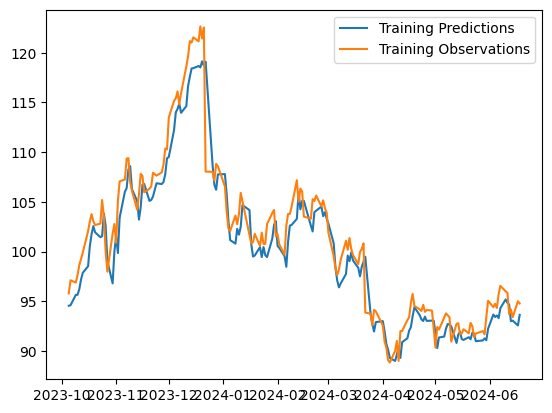

In [13]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_training.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


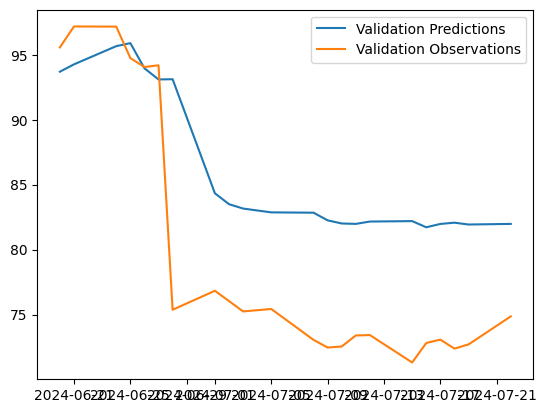

In [14]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_validation.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


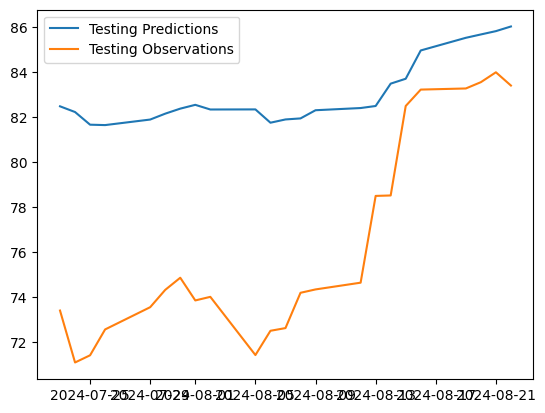

In [15]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_testing.png"
plt.savefig(save_path)

In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
